In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
plt.rcParams['font.family'] = 'Tahoma'
plt.rcParams['axes.unicode_minus'] = False



### **1. Central Limit Theorem (CLT)**

* ไอเดีย: แจกแจงข้อมูลไม่ปกติ เช่น Exponential
* สุ่มตัวอย่างหลายๆ ครั้ง → ค่าเฉลี่ยเริ่มกระจายใกล้ Normal



In [5]:
population = np.random.exponential(scale=2, size=100000)
population


array([ 1.55076523,  2.83724646,  1.12141667, ...,  2.86752104,
        3.62662031, 12.40191534], shape=(100000,))

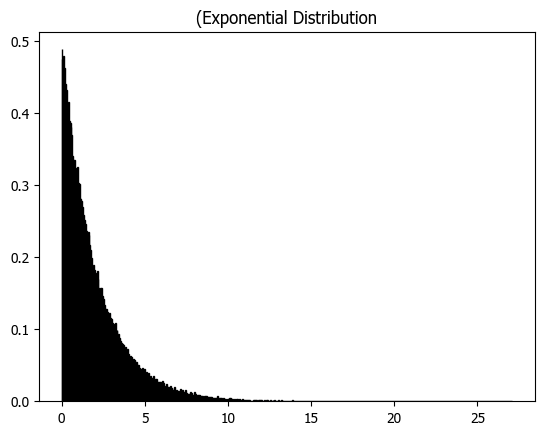

population mean: 2.0014
population std: 2.0009


In [6]:
plt.hist(population, bins=500, density=True, color='skyblue', edgecolor='black')
plt.title('(Exponential Distribution')
plt.show()

population_mean = np.mean(population)
population_std = np.std(population)
print(f"population mean: {population_mean:.4f}")
print(f"population std: {population_std:.4f}")

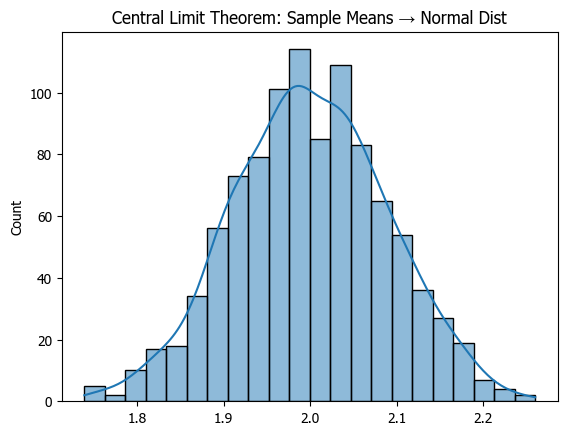

Sample Means: Mean = 2.0000, Std = 0.0882
Population: Mean = 2.0014, Std = 2.0009


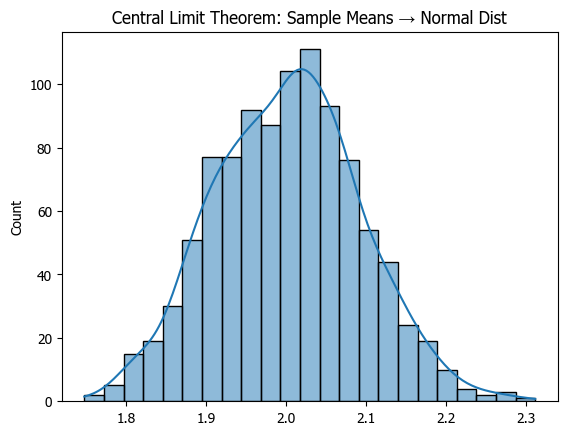

Sample Means: Mean = 2.0016, Std = 0.0908
Population: Mean = 2.0014, Std = 2.0009


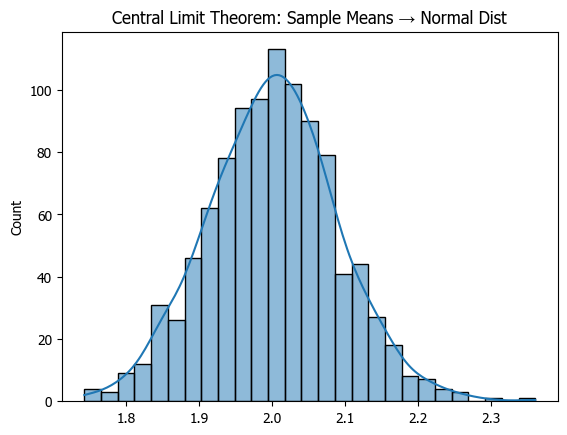

Sample Means: Mean = 2.0011, Std = 0.0885
Population: Mean = 2.0014, Std = 2.0009


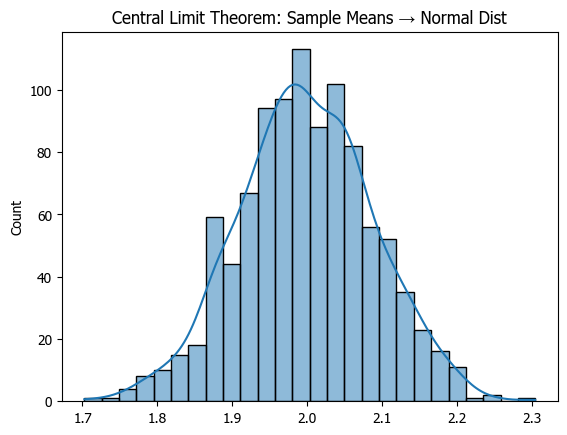

Sample Means: Mean = 1.9986, Std = 0.0891
Population: Mean = 2.0014, Std = 2.0009


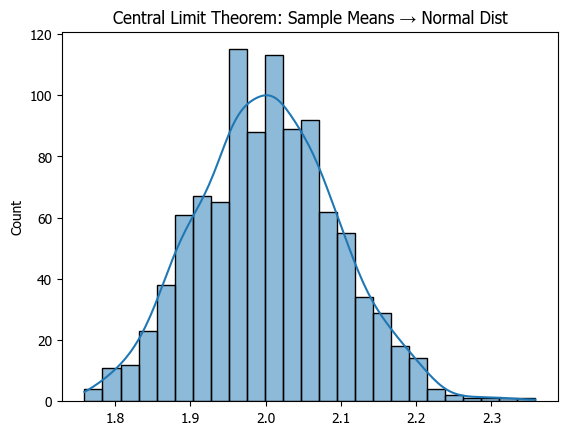

Sample Means: Mean = 2.0028, Std = 0.0927
Population: Mean = 2.0014, Std = 2.0009


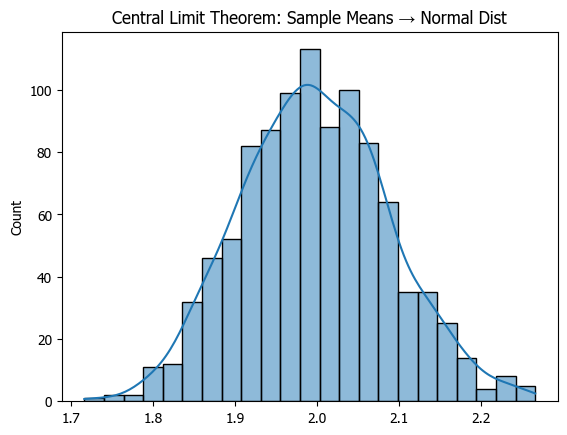

Sample Means: Mean = 1.9979, Std = 0.0903
Population: Mean = 2.0014, Std = 2.0009


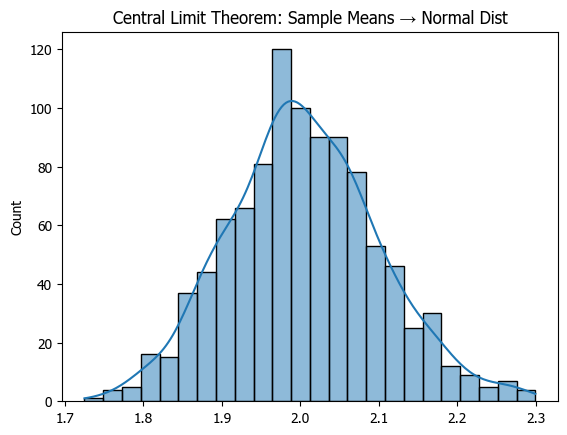

Sample Means: Mean = 2.0045, Std = 0.0958
Population: Mean = 2.0014, Std = 2.0009


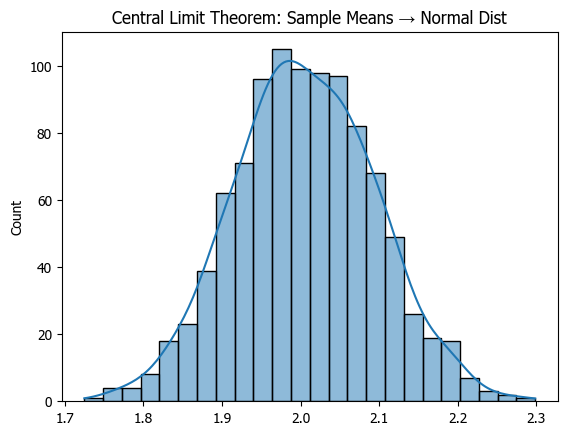

Sample Means: Mean = 2.0055, Std = 0.0893
Population: Mean = 2.0014, Std = 2.0009


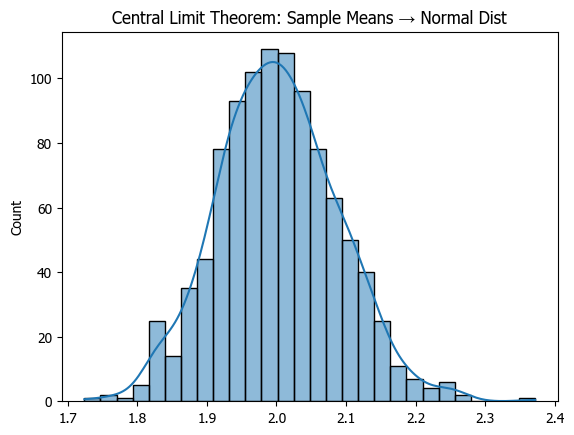

Sample Means: Mean = 2.0024, Std = 0.0868
Population: Mean = 2.0014, Std = 2.0009


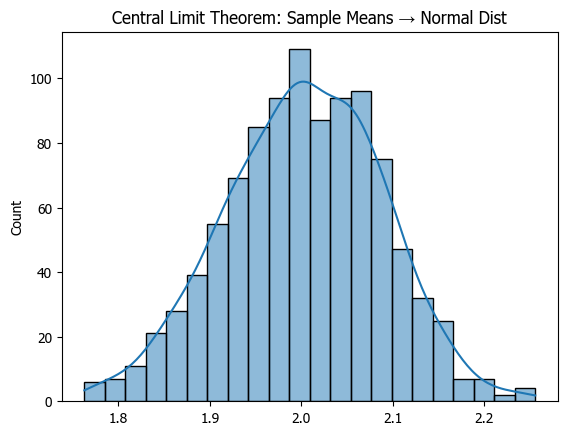

Sample Means: Mean = 2.0030, Std = 0.0856
Population: Mean = 2.0014, Std = 2.0009


In [7]:
for i in range(10):
        sample_means = [np.mean(np.random.choice(population, size=500)) for _ in range(1000)]

        sns.histplot(sample_means, kde=True)
        plt.title("Central Limit Theorem: Sample Means → Normal Dist")
        plt.show()

        print(f"Sample Means: Mean = {np.mean(sample_means):.4f}, Std = {np.std(sample_means):.4f}")
        print(f"Population: Mean = {population_mean:.4f}, Std = {population_std:.4f}")

### **2. Confidence Intervals (CI)**

* คำนวณช่วงความมั่นใจ 95% ของค่าเฉลี่ย

In [8]:
sample = np.random.choice(population, size=200)
mean = np.mean(sample)
ci = stats.norm.interval(0.95, loc=mean, scale=stats.sem(sample))
print(f"Mean = {mean:.2f}, 95% CI = {ci}")

Mean = 2.06, 95% CI = (np.float64(1.7631461465074458), np.float64(2.3510208032001056))


Light Bulb Lifespan

สมมติว่าผู้ผลิตอ้างว่าอายุเฉลี่ยของหลอดไฟคือ 1200 ชั่วโมง โดยมี σ = 100 ชั่วโมง แล้วเราสุ่มหลอด 100 ดวง วัดได้ค่าเฉลี่ย X̄ = 1150 ชั่วโมง จะได้ CI ดังนี้:

1150±1.96×100
​100​=1150±19.6=(1130.4,1169.6) ชั่วโมง

In [70]:
import numpy as np
import scipy.stats as stats

# สมมติ data: อายุหลอดไฟ 100 ดวง (สุ่มโดยใช้ normal distribution)
# np.random.seed(42)
data = np.random.normal(loc=1200, scale=100, size=100) #loc = mean, scale = sd, size = n

# cal mean sd n
mean = np.mean(data)
sd = np.std(data, ddof=1)  # sample standard deviation
n = len(data)

# cal t-value at 95% cl 
t_crit = stats.t.ppf(0.975, df=n-1)
moe = t_crit * (sd / np.sqrt(n))
ci_lower, ci_upper = mean - moe, mean + moe

print(f"Sample mean: {mean:.2f}")
print(f"95% confidence interval: ({ci_lower:.2f}, {ci_upper:.2f})")


Sample mean: 1190.51
95% confidence interval: (1171.15, 1209.87)


In [71]:
target = 1200
in_ci = (ci_lower <= target <= ci_upper)
print("Target inside CI?")
print("answer:", in_ci)

Target inside CI?
answer: True
